#**ResNet CNN with Google Colab**

This is Mk I of the ResNet CNN used in the Google Colab workspace. 

In [1]:
#@title 1.0 Mount the Drive and import all necessary packages

import tensorflow as tf
from tensorflow import keras
from google.colab import drive
from tensorflow.keras import layers, models
from pandas import DataFrame
import gspread
import pandas as pd
import numpy as np
from oauth2client.service_account import ServiceAccountCredentials
import pickle
import pywt

drive.mount('/content/gdrive')

Mounted at /content/gdrive


##2.0 Load Training/Testing Data
First we need to specify the filepath for each of the training and testing datasets. Check the /contents/gdrive directory to the left and copy the path that each dataset is in. To download data of the 5 amino acids we trained our network on, click here...

### 2.1 Training Datasets

In [13]:
Training_Data_One = "/content/gdrive/MyDrive/RamanSpectra/ImageScans/Amino Acids/Asparagine.csv" #@param {type:"raw"}
Training_Data_Two = "/content/gdrive/MyDrive/RamanSpectra/ImageScans/Amino Acids/Histidine.csv" #@param {type:"raw"}
Training_Data_Three = "/content/gdrive/MyDrive/RamanSpectra/ImageScans/Amino Acids/Glycine.csv" #@param {type:"raw"}
Training_Data_Four = "/content/gdrive/MyDrive/RamanSpectra/ImageScans/Amino Acids/Leucine.csv" #@param {type:"raw"}
Training_Data_Five = "/content/gdrive/MyDrive/RamanSpectra/ImageScans/Amino Acids/Lysine.csv" #@param {type:"raw"}
#Training_Data_Six = "/content/gdrive/MyDrive/RamanSpectra/ImageScans/Chloroquine.csv" #@param {type:"raw"}

training1 = pd.read_csv(Training_Data_One)
training2 = pd.read_csv(Training_Data_Two)
training3 = pd.read_csv(Training_Data_Three)
training4 = pd.read_csv(Training_Data_Four)
training5 = pd.read_csv(Training_Data_Five)
#training6 = pd.read_csv(Training_Data_Six)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,2

###2.2 Testing Datasets

In [14]:
Testing_Data_One = "/content/gdrive/MyDrive/RamanSpectra/TimeSeries/data1_TimesSeries_100_001_Spec.Data 1.csv" #@param {type:"raw"}
Testing_Data_Two = "/content/gdrive/MyDrive/RamanSpectra/TimeSeries/data4_TimesSeries_100_002_Spec.Data 1.csv" #@param {type:"raw"}
Testing_Data_Three = "/content/gdrive/MyDrive/RamanSpectra/TimeSeries/data3_TimesSeries_100_003_Spec.Data 1.csv" #@param {type:"raw"}
Testing_Data_Four = "/content/gdrive/MyDrive/RamanSpectra/TimeSeries/data5_TimesSeries_100_004_Spec.Data 1.csv" #@param {type:"raw"}
Testing_Data_Five = "/content/gdrive/MyDrive/RamanSpectra/TimeSeries/data6_TimesSeries_100_006_Spec.Data 1.csv" #@param {type:"raw"}
#Testing_Data_Six = "/content/gdrive/MyDrive/RamanSpectra/TimeSeries/data10_Time Series_001_Spec.Data 1.csv" #@param {type:"raw"}

testing1 = pd.read_csv(Testing_Data_One)
testing2 = pd.read_csv(Testing_Data_Two)
testing3 = pd.read_csv(Testing_Data_Three)
testing4 = pd.read_csv(Testing_Data_Four)
testing5 = pd.read_csv(Testing_Data_Five)
#testing6 = pd.read_csv(Testing_Data_Six)

##3.0 Add Labels to the Datssets

In [15]:
#@title The data must now be converted to a Dataframe with pandas. We will also need to drop the "x-axis" column from the imported datasets

train1 = pd.DataFrame(training1)
train2 = pd.DataFrame(training2)
train3 = pd.DataFrame(training3)
train4 = pd.DataFrame(training4)
train5 = pd.DataFrame(training5)
#train6 = pd.DataFrame(training6)

test1 = pd.DataFrame(testing1)
test2 = pd.DataFrame(testing2)
test3 = pd.DataFrame(testing3)
test4 = pd.DataFrame(testing4)
test5 = pd.DataFrame(testing5)
#test6 = pd.DataFrame(testing6)

train1 = train1.drop(index=0,columns="X-Axis")
train2 = train2.drop(index=0,columns="X-Axis")
train3 = train3.drop(index=0,columns="X-Axis")
train4 = train4.drop(index=0,columns="X-Axis")
train5 = train5.drop(index=0,columns="X-Axis")
#train6 = train6.drop(index=0,columns="X-Axis")

test1 = test1.drop(index=0,columns="X-Axis")
test2 = test2.drop(index=0,columns="X-Axis")
test3 = test3.drop(index=0,columns="X-Axis")
test4 = test4.drop(index=0,columns="X-Axis")
test5 = test5.drop(index=0,columns="X-Axis")
#test6 = test6.drop(index=0,columns="X-Axis")


In [16]:
#@title The data is loaded unlabeled so labels must be created for the spectra

#Create labels for data
train1_lab = [0]*train1.shape[1]
train2_lab = [1]*train2.shape[1]
train3_lab = [2]*train3.shape[1]
train4_lab = [3]*train4.shape[1]
train5_lab = [4]*train5.shape[1]
#train6_lab = [5]*train6.shape[1]

test1_lab = [0]*test1.shape[1]
test2_lab = [1]*test2.shape[1]
test3_lab = [2]*test3.shape[1]
test4_lab = [3]*test4.shape[1]
test5_lab = [4]*test5.shape[1]
#test6_lab = [6]*test6.shape[1]

#transpose datasets
train1 = train1.T 
train2 = train2.T
train3 = train3.T
train4 = train4.T
train5 = train5.T
#train6 = train6.T

test1 = test1.T
test2 = test2.T
test3 = test3.T
test4 = test4.T
test5 = test5.T
#test6 = test6.T

train1['Label'] = train1_lab
train2['Label'] = train2_lab
train3['Label'] = train3_lab
train4['Label'] = train4_lab
train5['Label'] = train5_lab
#train6['Label'] = train6_lab

test1['Label'] = test1_lab
test2['Label'] = test2_lab
test3['Label'] = test3_lab
test4['Label'] = test4_lab
test5['Label'] = test5_lab
#test6['Label'] = test6_lab


##4.0 Preparating the data for ResNet

The spectra are loaded into the workspace as individual datasets. In order the feed the spectra into the neural network all datasets need to be concatenated into one dataframe and randomly shuffled. Once this is accomplished the training and the testing data can be fed into the ResNet. 

In [17]:
#@title Concatenate the training data (and the labels) into one dataframe. (current model shuffles data immediately after concatenating)

train = pd.concat([train1, train2, train3, train4, train5])

train_shuffle = train.sample(frac=1)

train_lab = train_shuffle.pop("Label")
train_lab = np.reshape(np.array(train_lab), (len(train_lab),1))
train_inpt = np.array(train_shuffle)

train_data = (train_inpt, train_lab)

In [18]:
#@title Pickle the concatenated/shuffled datasets
filePath = "/content/gdrive/MyDrive/Colab Notebooks/train_data.picke" #@param {type: "raw"}
out_training = open(filePath,"wb")
pickle.dump(train_data, out_training)
out_training.close()

In [19]:
#@title Load the Pickled file

in_training =open("/content/gdrive/MyDrive/Colab Notebooks/test_data.pickle", "rb")
data = pickle.load(in_training)
in_training.close()

Preprocess the data for the ResNet

##5.0 Training the ResNet



*   Optimizer Used: Adam
*   Loss: Sparse Categorical Cross Entropy
*   Activation for ResNet: ReLU
*   Activation for Output: softmax



In [28]:
#@title Preprocess the data

from keras.utils import to_categorical

inpt = train_data[0].reshape(train_data[0].shape[0],train_data[0].shape[1],1)
inpt = inpt.astype('float32')

lab = train_data[1]
lab = lab.astype('float32')
lab = to_categorical(lab)

#np.asarray(x).astype('float32').

In [29]:
NumberFeatureMaps = 64 #@param {type:"raw"}
NumberClasses =  5#@param {type:"raw"}
LearningRate = 0.0001 #@param {type:"raw"}
NumberEpochs = 25 #@param {type:"raw"
BatchSize = 50 #@param {type:"raw"}

In [41]:
#@title Compile the ResNet

input_layer = keras.layers.Input([train_data[0].shape[1],1])

# BLOCK 1

conv_x = keras.layers.Conv1D(filters=NumberFeatureMaps, kernel_size=8, padding='same')(input_layer)
conv_x = keras.layers.BatchNormalization()(conv_x)
conv_x = keras.layers.Activation('relu')(conv_x)

conv_y = keras.layers.Conv1D(filters=NumberFeatureMaps, kernel_size=5, padding='same')(conv_x)
conv_y = keras.layers.BatchNormalization()(conv_y)
conv_y = keras.layers.Activation('relu')(conv_y)

conv_z = keras.layers.Conv1D(filters=NumberFeatureMaps, kernel_size=3, padding='same')(conv_y)
conv_z = keras.layers.BatchNormalization()(conv_z)

# expand channels for the sum
shortcut_y = keras.layers.Conv1D(filters=NumberFeatureMaps, kernel_size=1, padding='same')(input_layer)
shortcut_y = keras.layers.BatchNormalization()(shortcut_y)

output_block_1 = keras.layers.add([shortcut_y, conv_z])
output_block_1 = keras.layers.Activation('relu')(output_block_1)
output_block_1 = keras.layers.Dropout(.5)(output_block_1)

# BLOCK 2

conv_x = keras.layers.Conv1D(filters=NumberFeatureMaps * 2, kernel_size=8, padding='same')(output_block_1)
conv_x = keras.layers.BatchNormalization()(conv_x)
conv_x = keras.layers.Activation('relu')(conv_x)

conv_y = keras.layers.Conv1D(filters=NumberFeatureMaps * 2, kernel_size=5, padding='same')(conv_x)
conv_y = keras.layers.BatchNormalization()(conv_y)
conv_y = keras.layers.Activation('relu')(conv_y)

conv_z = keras.layers.Conv1D(filters=NumberFeatureMaps * 2, kernel_size=3, padding='same')(conv_y)
conv_z = keras.layers.BatchNormalization()(conv_z)

# expand channels for the sum

shortcut_y = keras.layers.Conv1D(filters=NumberFeatureMaps * 2, kernel_size=1, padding='same')(output_block_1)
shortcut_y = keras.layers.BatchNormalization()(shortcut_y)

output_block_2 = keras.layers.add([shortcut_y, conv_z])
output_block_2 = keras.layers.Activation('relu')(output_block_2)
output_block_2 = keras.layers.Dropout(.5)(output_block_2)

# BLOCK 3

conv_x = keras.layers.Conv1D(filters=NumberFeatureMaps * 2, kernel_size=8, padding='same')(output_block_2)
conv_x = keras.layers.BatchNormalization()(conv_x)
conv_x = keras.layers.Activation('relu')(conv_x)

conv_y = keras.layers.Conv1D(filters=NumberFeatureMaps * 2, kernel_size=5, padding='same')(conv_x)
conv_y = keras.layers.BatchNormalization()(conv_y)
conv_y = keras.layers.Activation('relu')(conv_y)

conv_z = keras.layers.Conv1D(filters=NumberFeatureMaps * 2, kernel_size=3, padding='same')(conv_y)
conv_z = keras.layers.BatchNormalization()(conv_z)

# no need to expand channels because they are equal

shortcut_y = keras.layers.BatchNormalization()(output_block_2)

output_block_3 = keras.layers.add([shortcut_y, conv_z])
output_block_3 = keras.layers.Activation('relu')(output_block_3)

# FINAL

gap_layer = keras.layers.GlobalAveragePooling1D()(output_block_3)

output_layer = keras.layers.Dense(128, activation='relu')(gap_layer)
output_layer = keras.layers.Dropout(.5)(output_layer)
output_layer = keras.layers.Dense(NumberClasses, activation='softmax')(output_layer)

res_net = keras.models.Model(inputs=input_layer, outputs=output_layer)

res_net.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=LearningRate),
             metrics=['accuracy'])

In [42]:
#@title Train the ResNet

ResNet = res_net.fit(inpt, lab, epochs = NumberEpochs, 
                     batch_size=BatchSize, 
                     validation_split=.2)

                     #callbacks=train_checkpoint)

Epoch 1/25
200/200 [==============================] - 30s 105ms/step - loss: 1.2341 - accuracy: 0.4814 - val_loss: 1.6728 - val_accuracy: 0.3560
Epoch 2/25
200/200 [==============================] - 21s 103ms/step - loss: 0.3421 - accuracy: 0.9271 - val_loss: 0.2999 - val_accuracy: 0.9264
Epoch 3/25
200/200 [==============================] - 21s 104ms/step - loss: 0.1098 - accuracy: 0.9912 - val_loss: 0.0502 - val_accuracy: 0.9884
Epoch 4/25
200/200 [==============================] - 21s 104ms/step - loss: 0.0463 - accuracy: 0.9980 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 5/25
200/200 [==============================] - 21s 105ms/step - loss: 0.0217 - accuracy: 0.9993 - val_loss: 0.0035 - val_accuracy: 0.9992
Epoch 6/25
200/200 [==============================] - 21s 106ms/step - loss: 0.0159 - accuracy: 0.9989 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 7/25
200/200 [==============================] - 21s 106ms/step - loss: 0.0100 - accuracy: 0.9997 - val_loss: 0.0017 - val_ac

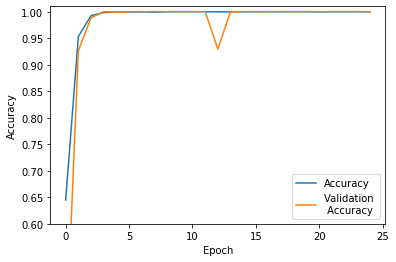

In [44]:
#@title Model training accuracy
from matplotlib import pyplot as plt

plt.plot(ResNet.history['accuracy'], label='Accuracy')
plt.plot(ResNet.history['val_accuracy'], label='Validation \n Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.6, 1.01])
plt.legend(loc='lower right')
#plt.title("ResNet CNN")
plt.show()


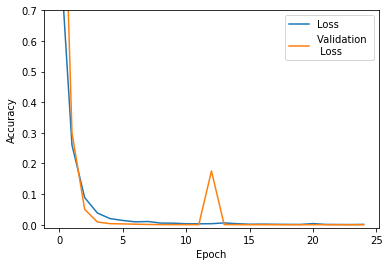

<Figure size 432x288 with 0 Axes>

In [45]:
#@title Model training loss

plt.plot(ResNet.history['loss'], label='Loss')
plt.plot(ResNet.history['val_loss'], label='Validation \n Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([-0.01, 0.7])
plt.legend(loc='upper right')
plt.show()
plt.savefig("resNet-CNN-acc.png")

##6.0 Test the network

In [51]:
#@title Concatenate the testing dataset



test = pd.concat([test1, test2, test3, test4, test5])
test_data = test.sample(frac=1)

test_lab = test_data.pop("Label")
test_lab = np.reshape(np.array(test_lab), (len(test_lab),1))
test_inpt = np.array(test_data)

t_data = (test_inpt, test_lab)

test_out = open("/content/gdrive/My Drive/Colab Notebooks/test_data.pickle", "wb")
pickle.dump(t_data, test_out)
test_out.close()

test_in = open("/content/gdrive/My Drive/Colab Notebooks/test_data.pickle", "rb")
t_data = pickle.load(test_in)
test_in.close()


In [54]:
#@title Reshape testing data
test_input = t_data[0].reshape(t_data[0].shape[0],t_data[0].shape[1],1)
test_input = test_input.astype('float32')

t_lab = t_data[1]
t_lab = t_lab.astype('float32')
t_lab = to_categorical(t_lab)

In [59]:
#@title Classify the testing data

y_predict = res_net.predict(test_input)
y_actual = t_lab

In [60]:
#@title *optional*: Print raw results

#predicted labels
print(len(y_predict), y_predict.shape)
print(y_predict)

#actual labels
print(len(y_actual), y_actual.shape)
print(y_actual)

500 (500, 5)
[[1.6040745e-05 7.9139218e-06 1.9062378e-05 1.1767456e-03 9.9878019e-01]
 [1.9704103e-05 8.1102644e-06 1.9163661e-05 1.6912550e-03 9.9826175e-01]
 [4.9056485e-05 9.9993956e-01 1.4579325e-06 2.4808767e-07 9.6787635e-06]
 ...
 [3.7277867e-05 9.9994123e-01 1.9192360e-06 3.0846076e-07 1.9165447e-05]
 [1.0000000e+00 5.1943093e-08 5.0539870e-09 4.7221329e-09 6.7351863e-10]
 [1.3864115e-04 9.9978024e-01 6.2921708e-06 1.1798580e-06 7.3598269e-05]]
500 (500, 5)
[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [62]:
#@title Accuracy of ResNet
from sklearn.metrics import accuracy_score, f1_score, precision_score

acc = (y_predict.argmax(axis=1) == y_actual.argmax(axis=1)).mean()
print('Accuracy: {:0.1f}%'.format(100*acc))

f1score = f1_score(y_actual.argmax(axis=1), y_predict.argmax(axis=1), average='micro')
prec_score = precision_score(y_actual.argmax(axis=1), y_predict.argmax(axis=1), average='micro')
print("F1 score: ", f1score)
print("Precision score: ", prec_score)

Accuracy: 95.4%
F1 score:  0.954
Precision score:  0.954


Label the samples for the confusion matrix. Make sure that the labels are in the order of the input data from Part 1.0

In [63]:
SampleOne = "Asparagine" #@param {type:"raw"}
SampleTwo = "Histdine" #@param {type:"raw"}
SampleThree = "Glycine" #@param {type:"raw"}
SampleFour = "Leucine" #@param {type:"raw"}
SampleFive = "Lysine" #@param {type:"raw"}
#SampleSix = "SampleLabel" #@param {type:"raw"}

order = {0,1,2,3,4}

chem_species = {}
chem_species[0] = SampleOne
chem_species[1] = SampleTwo
chem_species[2] = SampleThree
chem_species[3] = SampleFour
chem_species[4] = SampleFive
#chem_species[5] = SampleSix

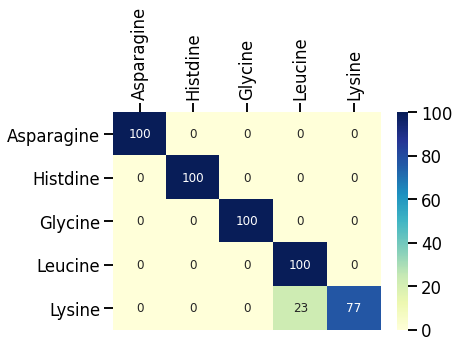

In [64]:
#@title Confusion matrix

import seaborn as sns
from sklearn.metrics import confusion_matrix


sns.set_context("talk", rc={"font":"Helvetica", "font.size":12})
label = [chem_species[i] for i in order] 
#takes a vector of the labels that were previously one-hot encoded
con_mat = confusion_matrix(y_actual.argmax(axis=1), 
                           y_predict.argmax(axis=1))
con_mat = 100 * con_mat / con_mat.sum(axis=1)[:,np.newaxis]
ax = sns.heatmap(con_mat, annot=True, cmap='YlGnBu', fmt='0.0f',
                 xticklabels=label, yticklabels=label)
ax.xaxis.tick_top()
plt.xticks(rotation=90) 
plt.show()